In [1]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

In [2]:
def show_img(image):
    plt.figure(figsize=(16,16))
    plt.imshow(image)

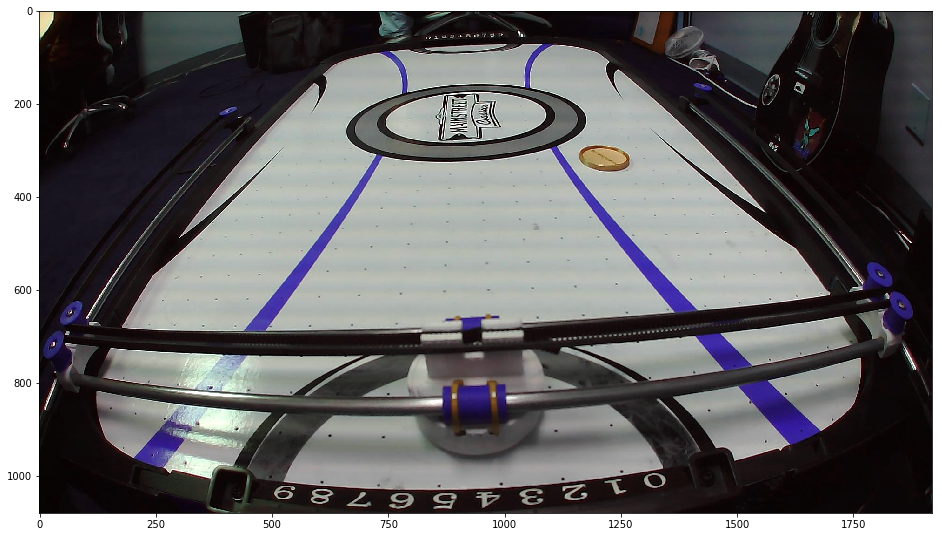

In [3]:
image=cv2.imread("Center_4.jpg")
orig = image.copy()
show_img(image)

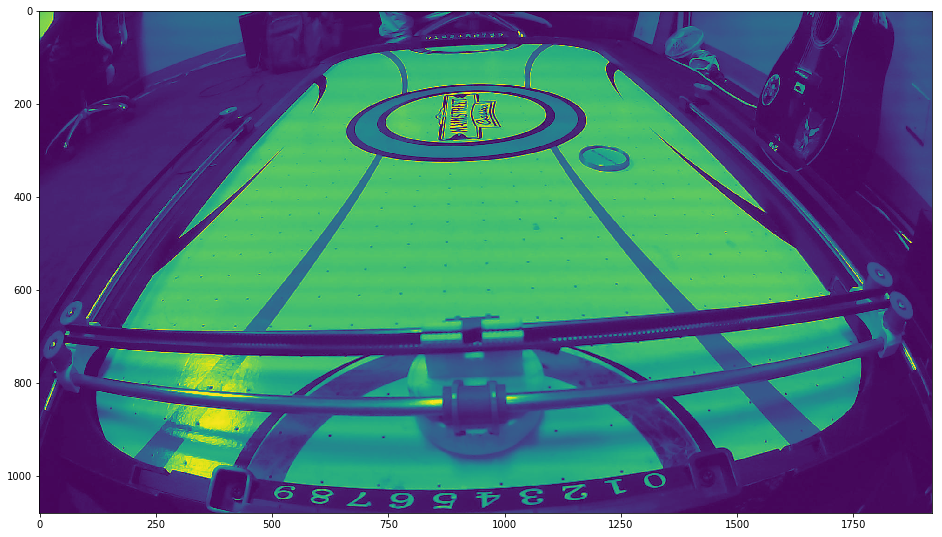

In [4]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_img(gray)

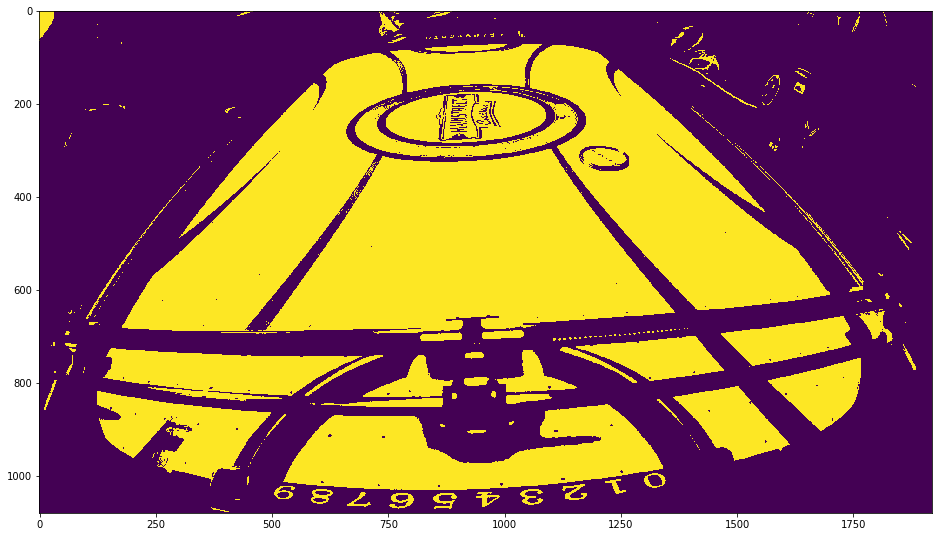

In [22]:
# Apply threshold to grayscale img. (Converts to b&w)
t, bw = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
show_img(bw)

Kernel: (1, 65)


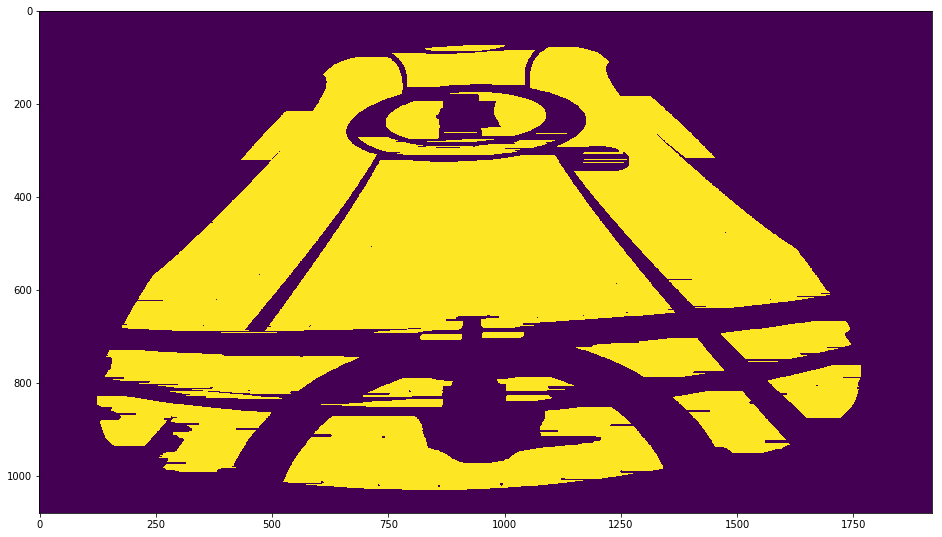

In [32]:
kernel1=1
kernel2=60
while True:    
    kernel = np.ones((kernel1,kernel2))
    opened=cv2.morphologyEx(bw,cv2.MORPH_OPEN, kernel)    

    zero_count_l=np.count_nonzero(opened[:,:120])
    zero_count_r=np.count_nonzero(opened[:,1780:])
    if zero_count_l > 0 or zero_count_r > 0:
        #kernel1+=1 
        kernel2+=1
    else:
        print "Kernel:",(kernel1,kernel2)
        break

show_img(opened)

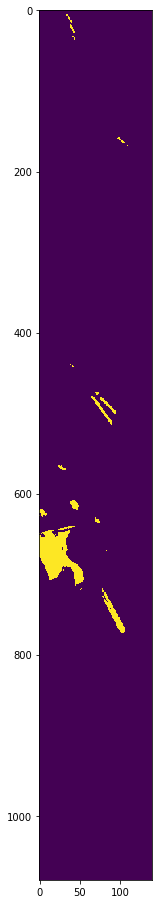

In [31]:
show_img(bw[:,1780:])

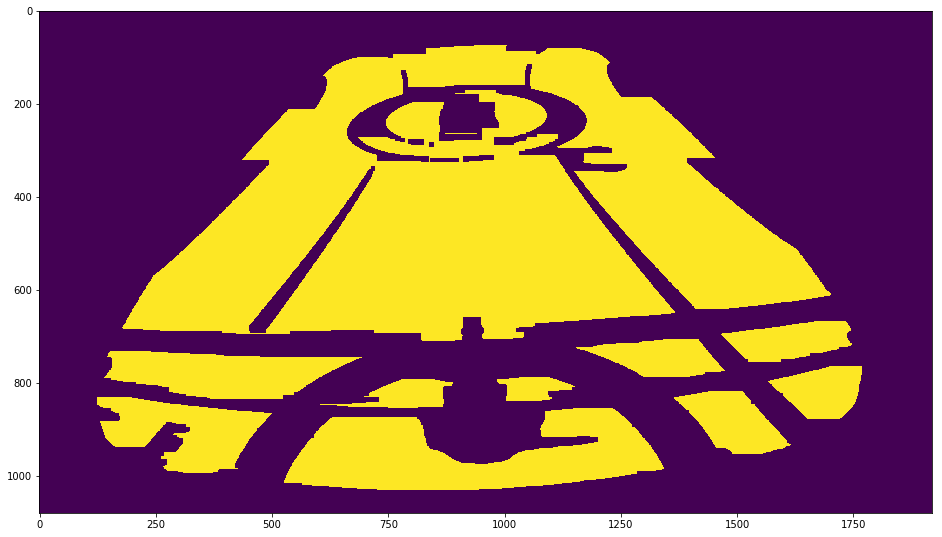

In [33]:
# this cleans up the noise on the inside and reduces the number of
# objects.
closed=cv2.morphologyEx(opened, cv2.MORPH_CLOSE, np.ones((10,10)))
show_img(closed)

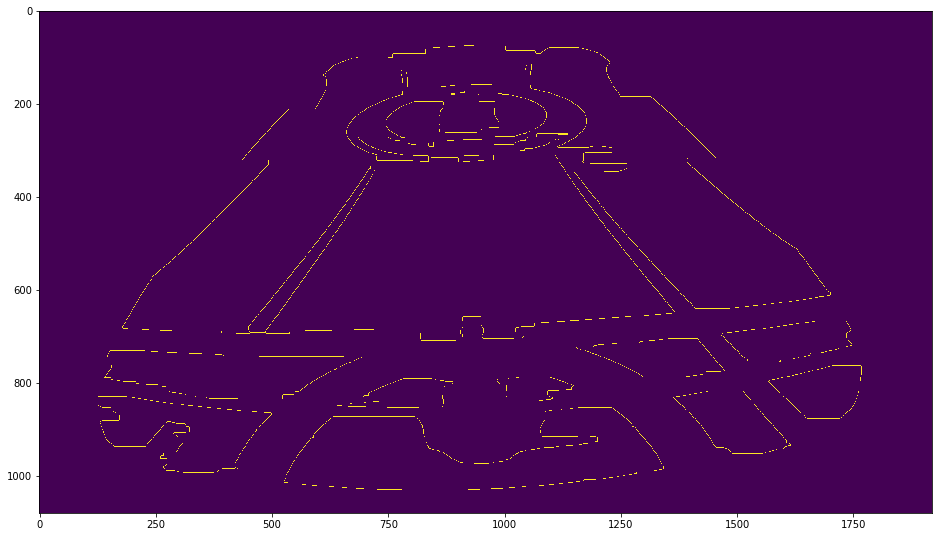

In [34]:
edges = cv2.Canny(closed,1,1)
show_img(edges)

In [35]:
np.count_nonzero(edges)

18403

In [36]:
xs, ys = np.where(edges > 0)
edgePts=np.array(zip(ys,xs))

In [37]:
hull = cv2.convexHull(edgePts)

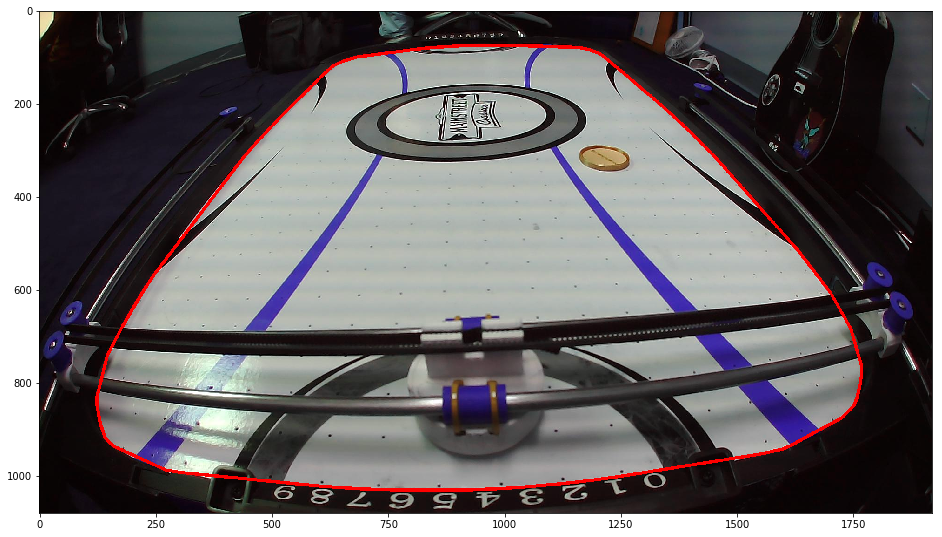

In [38]:
disp_img=image.copy()
img = cv2.polylines(disp_img, [hull], True, (255, 0, 0), 5)

show_img(disp_img)

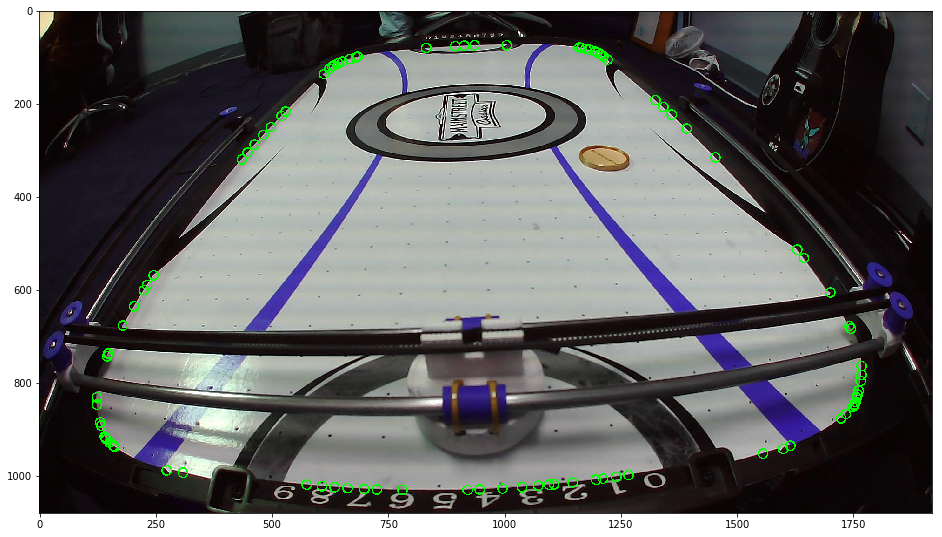

In [46]:
disp_img=image.copy()
for i in range(len(hull)):
    img = cv2.circle(disp_img, tuple(hull[i][0]), 10, (0,255,0), 2)
    
show_img(disp_img)

In [ ]:
# How can I convert these points into a rectangle/trapezoid?